In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

sns.set_theme()

#from modules.utils import load_yaml, load_pkl, make_directory, save_pkl, save_yaml

# Frequency Domain Analysis

In [2]:
DATA_PATH = '../../data/00_source'

df = pd.read_csv(os.path.join(DATA_PATH,"./train.csv"))
df.head()

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,5030HZ,5040HZ,5050HZ,5060HZ,5070HZ,5080HZ,5090HZ,5100HZ,5110HZ,5120HZ
0,out,0,2,2,0,2,0,2,2,2,...,2,5,2,2,5,2,2,5,2,5
1,out,0,0,0,3,0,3,0,0,0,...,0,3,3,3,3,3,3,3,3,6
2,out,0,4,4,4,4,5,4,4,5,...,5,5,6,5,6,6,6,5,6,4
3,out,0,6,5,5,6,5,6,6,5,...,6,6,7,7,5,6,5,5,7,7
4,out,0,3,0,0,3,0,0,3,3,...,3,3,3,3,3,3,3,3,3,3


### Data in FFT (Fourier) Space

https://www.kdnuggets.com/2020/02/fourier-transformation-data-scientist.html#:~:text=The%20Fourier%20transform%20is%20a,its%20constituent%20components%20and%20frequencies.

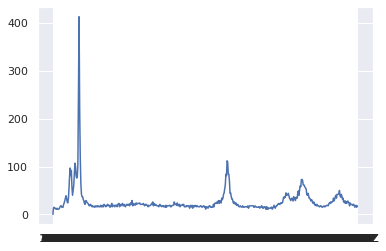

In [3]:
x_fft = df.iloc[10][1:]
plt.plot(x_fft)

### Data in $n$-space (real observations)

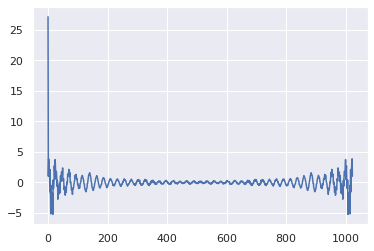

In [4]:
import scipy
import numpy as np

x_real_space = np.fft.irfft(x_fft)
plt.plot(x_real_space)

## Plot differences in frequency domain

In [5]:
DATA_PATH = '../../data/00_source/'

df = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
df.head()

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,5030HZ,5040HZ,5050HZ,5060HZ,5070HZ,5080HZ,5090HZ,5100HZ,5110HZ,5120HZ
0,out,0,2,2,0,2,0,2,2,2,...,2,5,2,2,5,2,2,5,2,5
1,out,0,0,0,3,0,3,0,0,0,...,0,3,3,3,3,3,3,3,3,6
2,out,0,4,4,4,4,5,4,4,5,...,5,5,6,5,6,6,6,5,6,4
3,out,0,6,5,5,6,5,6,6,5,...,6,6,7,7,5,6,5,5,7,7
4,out,0,3,0,0,3,0,0,3,3,...,3,3,3,3,3,3,3,3,3,3


In [31]:
for df_ in df_list:
    dn = df_.loc[:, df_.columns != 'leaktype'].to_numpy()
    print(dn[:, -].mean())

9.080555555555556
4.5114
6.317055555555555
7.682142857142857
6.637777777777778


In [6]:
# Group by leak type
df_list = [d for _, d in df.groupby(['leaktype'])]

leaktypes, data, stats_by_freqs = [], [], []

for df_ in df_list:
    leaktypes.append(df_['leaktype'].iloc[0])
    dn = df_.loc[:, df_.columns != 'leaktype'].to_numpy()
    data.append(dn)
    mean, std, max, min = dn.mean(axis=0), dn.std(axis=0), dn.max(axis=0), dn.min(axis=0)
    stats_by_freqs.append({'mean': mean, 'std':std, 'max':max, 'min':min})

In [24]:
def frequency_plot(mode='mean'):

    fig, axs = plt.subplots(1, 4, figsize = (24, 6))

    for i, leaktype in enumerate(leaktypes):
        freqs = 10*np.arange(len(stats_by_freqs[i][mode]))
        # Normal
        axs[0].plot(freqs, stats_by_freqs[i][mode], label=leaktype)
        # Log
        axs[1].plot(freqs, stats_by_freqs[i][mode], label=leaktype)
        # n-space (inverse Fourier) - single sided
        single_side = len(stats_by_freqs[i][mode])
        axs[2].plot(np.fft.irfft(stats_by_freqs[i][mode])[:single_side], label=leaktype)
        axs[3].plot(np.fft.irfft(stats_by_freqs[i][mode])[400:single_side], label=leaktype)

    axs[1].set_yscale('log')

    axs[0].set_title('Normal scale of {} values'.format(mode))
    axs[1].set_title('Log scale of {} values'.format(mode))
    axs[2].set_title('Inverse FFT of {} values'.format(mode))
    axs[3].set_title('Inverse FFT of {} values - snapshot'.format(mode))

    for ax in axs[:2]:
        ax.set_xlabel('Frequency (Hz)')
        ax.set_ylabel('Value')
        ax.legend()

    axs[2].set_ylabel('Value')

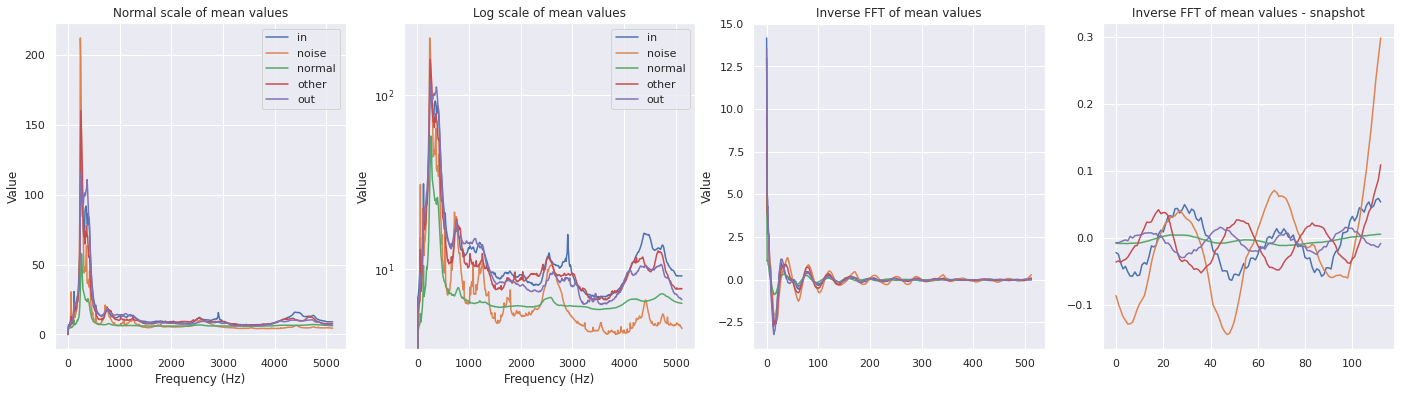

In [25]:
frequency_plot('mean')

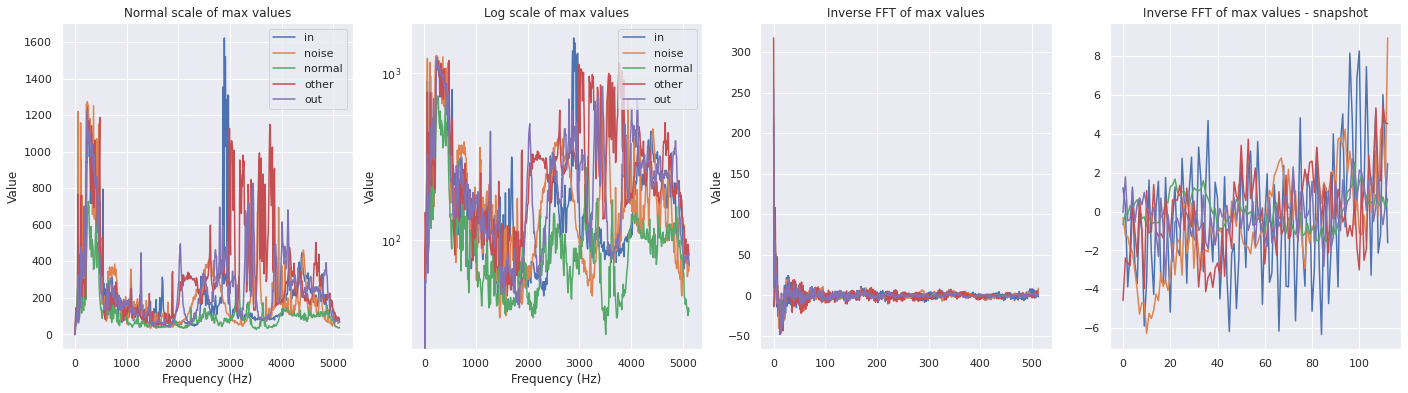

In [26]:
frequency_plot('max')

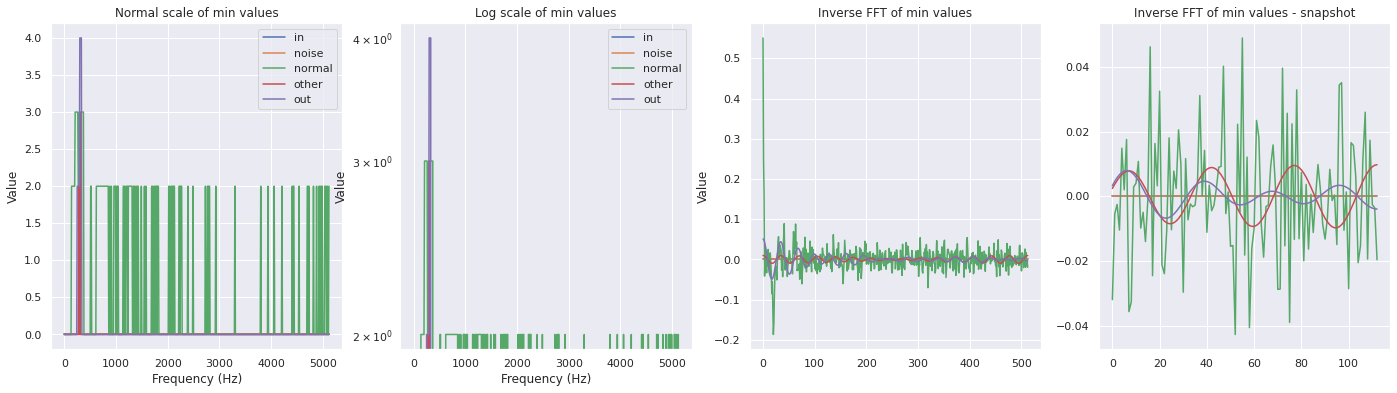

In [27]:
frequency_plot('min')

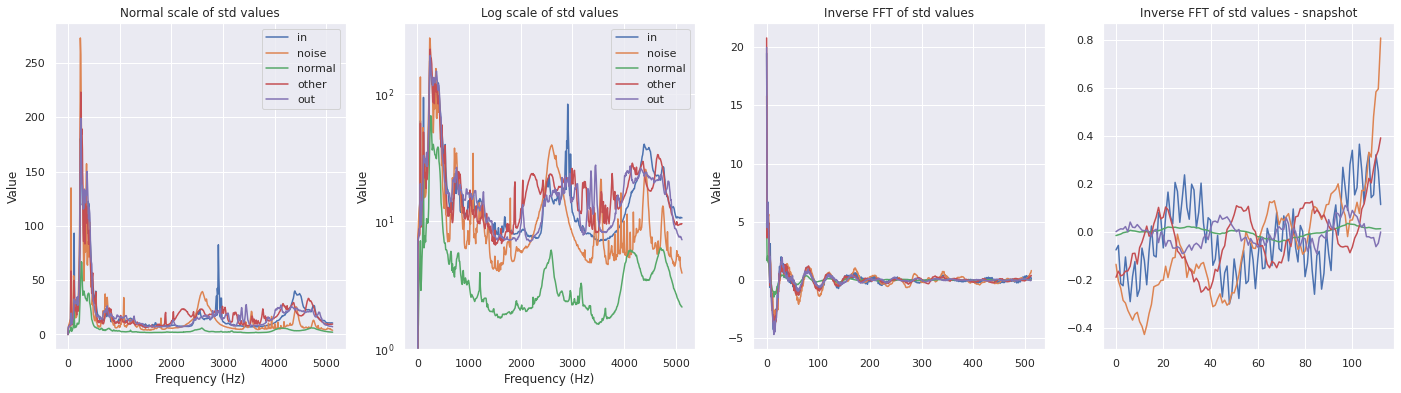

In [28]:
frequency_plot('std')

## Considerations

There seem to be some pretty obvious differences that we should take into account :) 

- The `normal` leaks have much more regular frequencies and lower peaks
- The `noise` leaks have very high peaks at certain frequencies
- The `in` leaks have many components especially at high frequency (that is why the first graph looks very "wiggly")
- And so on!
